In [83]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")


In [58]:
df = pd.read_csv("Series\monthly-sales-of-company-x-jan-6.csv")['Count']
N_pred = 30
train = df[:-N_pred]
test = df[-N_pred:]

Ищем оптимальные параметры ARIMA

In [85]:
best_mse = float('inf')
best_order = None
best_arm = None
for i in range(15):
    for d in range(5):
        for j in range(15):
            try:
                arm = ARIMA(train, order=(i, d, j), trend='ct').fit()
                pred = arm.forecast(steps=len(test))
                mse = mean_squared_error(test, pred)
                if mse < best_mse:
                    best_mse = mse
                    best_order = (i, d, j)
                    best_arm = arm
            except: continue
            
print(f'Оптимальные параметры:',best_order, ', RMSE =',sqrt(best_mse))

Оптимальные параметры: (12, 0, 11) , RMSE = 80.6214215104893


In [92]:
pred = best_arm.forecast(steps=len(test))
best_arm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Count   No. Observations:                   47
Model:               ARIMA(12, 0, 11)   Log Likelihood                -272.269
Date:                Mon, 26 May 2025   AIC                            596.539
Time:                        16:18:45   BIC                            644.642
Sample:                             0   HQIC                           614.640
                                 - 47                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.2850     13.710      5.710      0.000      51.413     105.157
x1             5.6539      0.502     11.263      0.000       4.670       6.638
ar.L1         -0.3425      0.208     -1.645      0.100      -0.751       0.065
ar.L2          0.3611      0.178      2.034      0.042       0.013       0.709
ar.L3         -0.4199      0.215     -1.951      0.051      -0.842       0.002
ar.L4          0.4627      0.187      2.471      0.013       0.096       0.830
ar.L5         -0.2952      0.140     -2.102      0.036      -0.570      -0.020
ar.L6          0.0078      0.185      0.042      0.966      -0.354       0.370
ar.L7          0.2830      0.148      1.908      0.056      -0.008       0.574
ar.L8         -0.4573      0.212     -2.159      0.031      -0.873      -0.042
ar.L9          0.4200      0.188      2.236      0.025       0.052       0.788
ar.L10        -0.3661      0.196     -1.871      0.061      -0.750       0.017
ar.L11         0.3547      0.172      2.063      0.039       0.018       0.692
ar.L12         0.9917      0.119      8.328      0.000       0.758       1.225
ma.L1          0.5998      0.531      1.131      0.258      -0.440       1.640
ma.L2          0.8608      0.222      3.877      0.000       0.426       1.296
ma.L3          0.7621      1.243      0.613      0.540      -1.674       3.198
ma.L4          0.0532      4.563      0.012      0.991      -8.891       8.997
ma.L5          0.5203      1.096      0.475      0.635      -1.629       2.669
ma.L6         -0.5238      0.862     -0.608      0.543      -2.214       1.166
ma.L7         -0.0464      4.389     -0.011      0.992      -8.648       8.555
ma.L8         -0.7746      1.061     -0.730      0.466      -2.855       1.306
ma.L9         -0.8494      0.228     -3.718      0.000      -1.297      -0.402
ma.L10        -0.6093      0.640     -0.953      0.341      -1.863       0.644
ma.L11        -0.9926      0.227     -4.381      0.000      -1.437      -0.549
sigma2       355.8443      0.002   1.64e+05      0.000     355.840     355.849
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):                 3.81
Prob(Q):                              0.40   Prob(JB):                         0.15
Heteroskedasticity (H):               2.55   Skew:                            -0.50
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.6e+23. Standard errors may be unstable.
"""

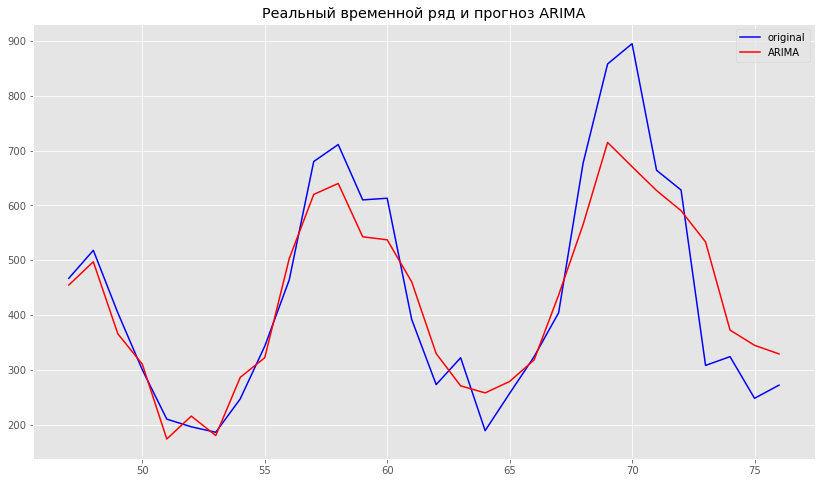

In [89]:
with plt.style.context("ggplot"):
    plt.figure(figsize=[14,8])
    plt.plot(test, color='blue', label='original')
    plt.plot(pred, color='red', label='ARIMA')
    plt.title('Реальный временной ряд и прогноз ARIMA')
    plt.legend()

График остатков предсказания

<AxesSubplot:>

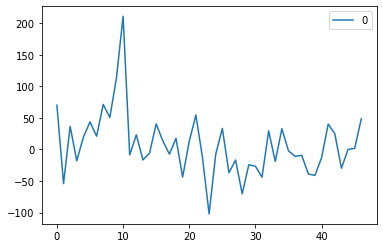

In [94]:
residuals = pd.DataFrame(best_arm.resid)
residuals.plot()

Распределение остатков

In [96]:
residuals.describe()

,0
count,47.000000
mean,7.479615
std,50.116182
min,-102.020529
25%,-18.403596
50%,-2.241464
75%,33.038190
max,210.840381
